In [5]:
import numpy as np
import pandas as pd

In [2]:
predictions = np.load('v2s_emo/predictions.npy')
labels = np.load('v2s_emo/labels.npy')

In [4]:
id2name = {
    0: 'Angry',
    1: 'Calm',
    2: 'Disgust',
    3: 'Fear',
    4: 'Happy',
    5: 'Neutral',
    6: 'Sad',
    7: 'Surprise',
}

In [6]:
df = pd.read_csv("emotions.csv")

In [7]:
df.head()

,Emotions,Path,fold,label
0,happy,/home/andrew/question-classification/audio_spe...,3,4
1,angry,/home/andrew/question-classification/audio_spe...,1,0
2,surprise,/home/andrew/question-classification/audio_spe...,4,7
3,surprise,/home/andrew/question-classification/audio_spe...,1,7
4,disgust,/home/andrew/question-classification/audio_spe...,1,2


In [10]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# to play the audio files
from IPython.display import Audio

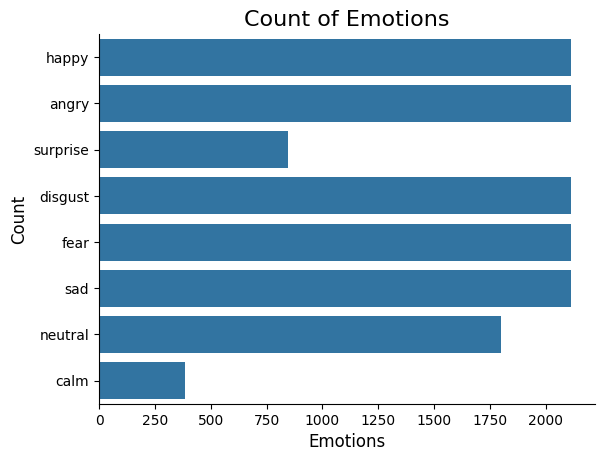

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [15]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

### FEAR SAMPLE

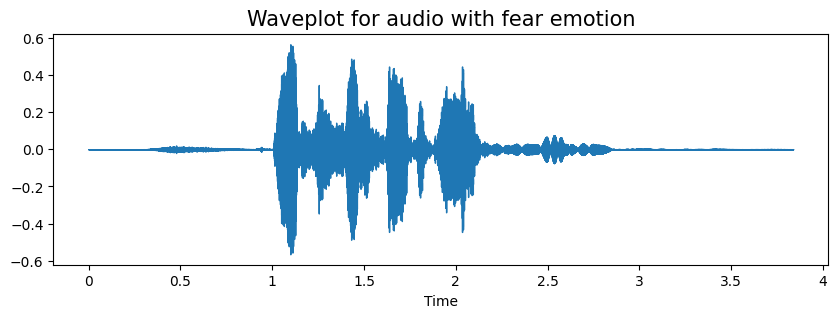

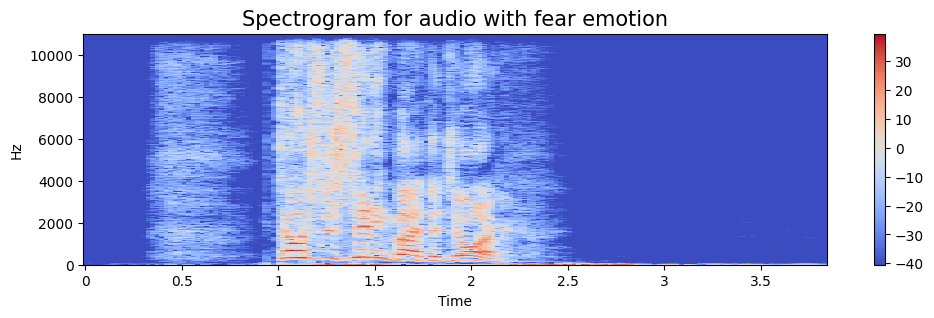

In [16]:
emotion='fear'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### ANGRY SAMPLE

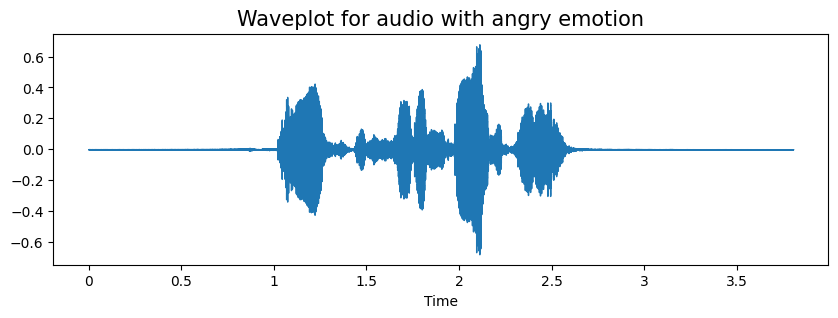

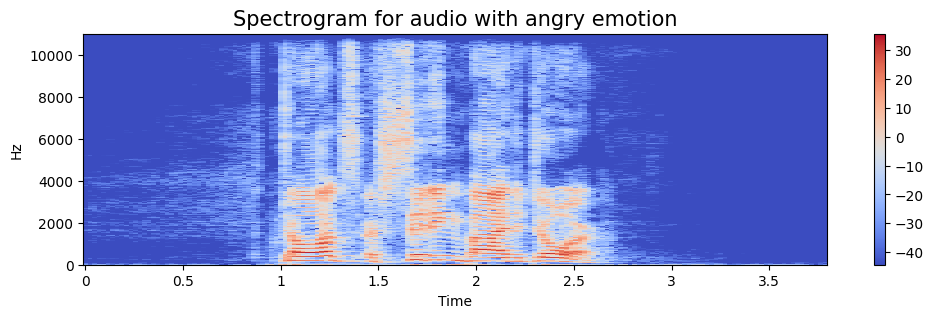

In [17]:
emotion='angry'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### SAD

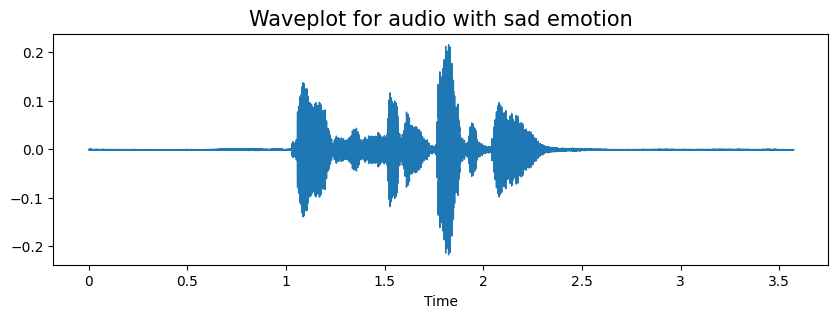

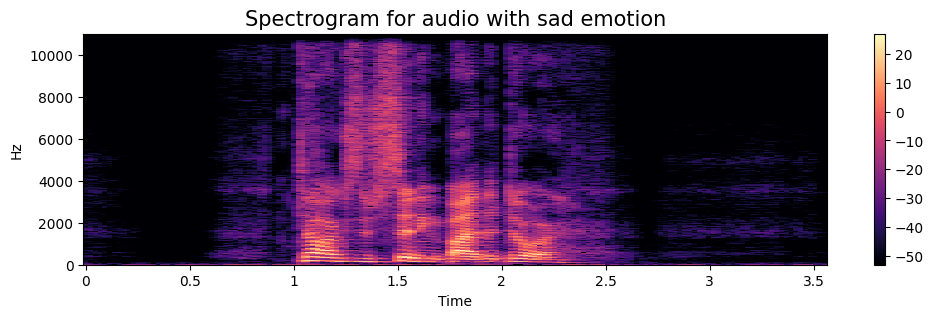

In [18]:
emotion='sad'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### happy

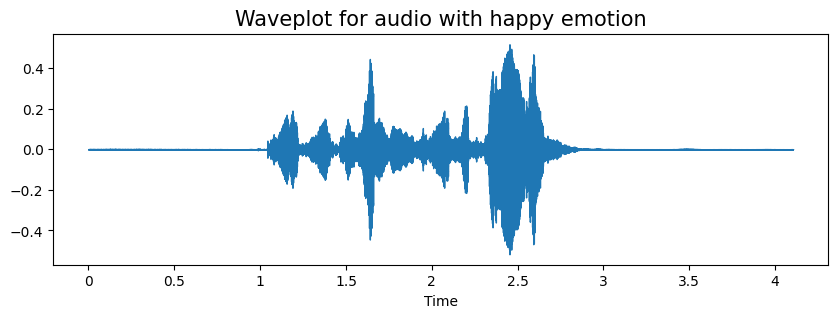

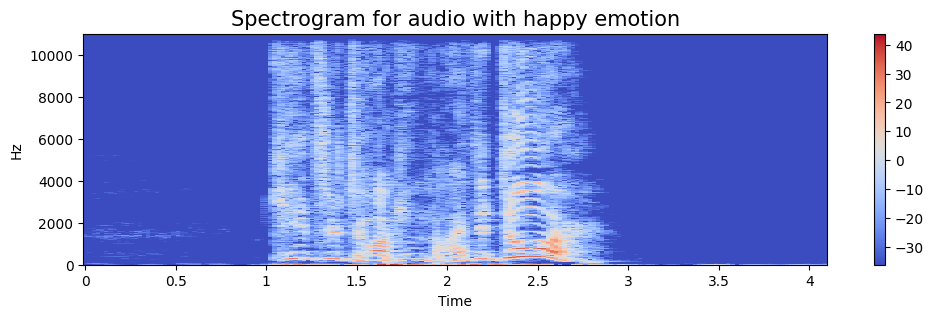

In [20]:
emotion='happy'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
# Get predicted labels from predictions array
predicted_labels = predictions.argmax(axis=1)

# Create DataFrame with predicted and actual labels
df_result = pd.DataFrame({
    'Predicted Labels': [id2name[label] for label in predicted_labels],
    'Actual Labels': [id2name[label] for label in labels]
})

In [22]:
# Calculate overall accuracy
accuracy = (df_result['Predicted Labels'] == df_result['Actual Labels']).mean()
print(f'Overall Accuracy: {accuracy:.2%}\n')

# Calculate accuracy for each class
class_accuracies = {}
for emotion in id2name.values():
    mask = df_result['Actual Labels'] == emotion
    class_accuracy = (df_result[mask]['Predicted Labels'] == df_result[mask]['Actual Labels']).mean()
    class_accuracies[emotion] = class_accuracy

# Print per-class accuracies
print('Accuracy by Class:')
for emotion, acc in class_accuracies.items():
    print(f'{emotion}: {acc:.2%}')

Overall Accuracy: 76.00%

Accuracy by Class:
Angry: 83.22%
Calm: 93.42%
Disgust: 72.81%
Fear: 66.90%
Happy: 74.94%
Neutral: 87.53%
Sad: 61.23%
Surprise: 95.86%


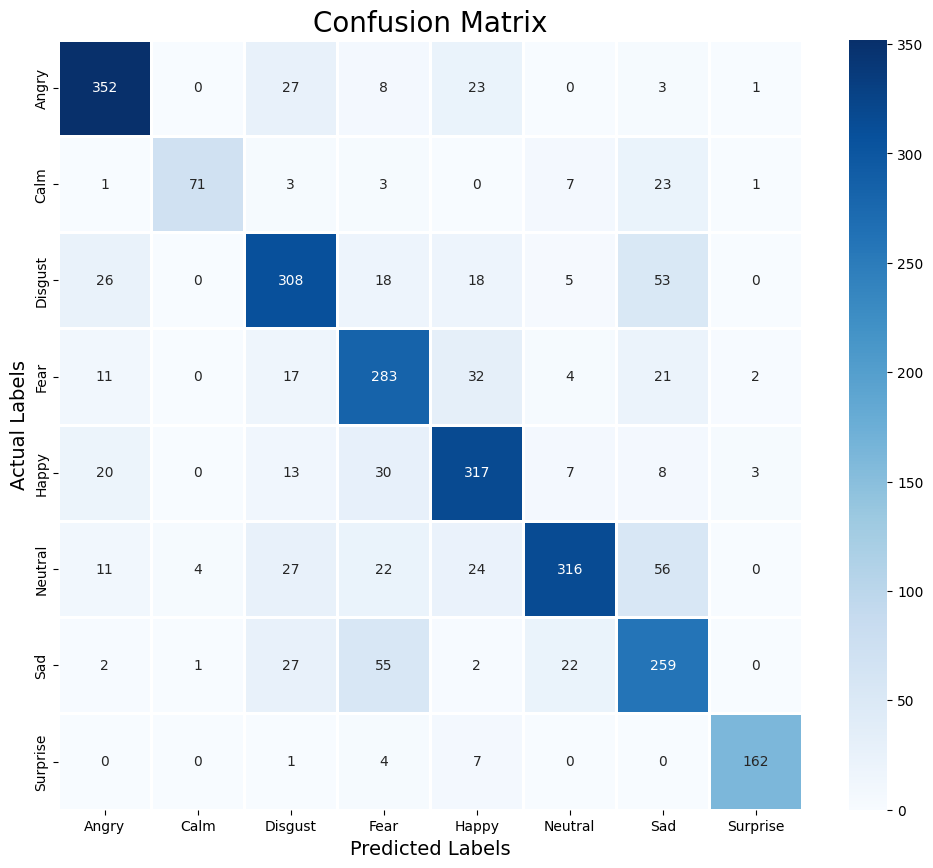

In [23]:
cm = confusion_matrix(df_result['Predicted Labels'].tolist(), df_result['Actual Labels'].tolist())
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [v for k, v in id2name.items()] , columns = [v for k, v in id2name.items()])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()